# Coinflipbet

Verifying the optimal strategy for the coin flip experiment
Experiment explained here in detail:
https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2856963

In [1]:
import random
import time

import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
from collections import Counter
import numpy as np
import pandas as pd


/home/atti/anaconda3/envs/py3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
def flip():    
    outcome = random.randint(1,100)
    #time.sleep(2)
    # heads = 1, tails 0
    if outcome < 60:
        return 1
    else:
        return 0

In [3]:
# start betting on biased coin
# strategy 1 bet on heads 20% of budget - according to Kelly`s criterion
def sim_kelly(budget, bet_pct):
    for i in range(0,300):
        bet = int(budget*bet_pct)
        outcome = flip()
        budget  = budget - bet + 2*outcome*bet
        #print(i,bet,outcome,budget)
    return budget

In [23]:
runs = []
for i in range(0,10000):
    total = sim_kelly(25,0.2)
    runs.append(total)
print("first 10 runs",runs[:10])


first 10 runs [4, 7908, 227446, 1188, 816, 6735, 148, 754, 886, 9506]


In [24]:
# statistics
mean = np.mean(runs)
maxval = max(runs)
minval = min(runs)
medianval = np.median(runs)
std = np.std(runs)
print(mean,maxval,minval,medianval,std)

1126895.7041 4280028020 4 2747.0 44252082.425


<Container object of 10000 artists>

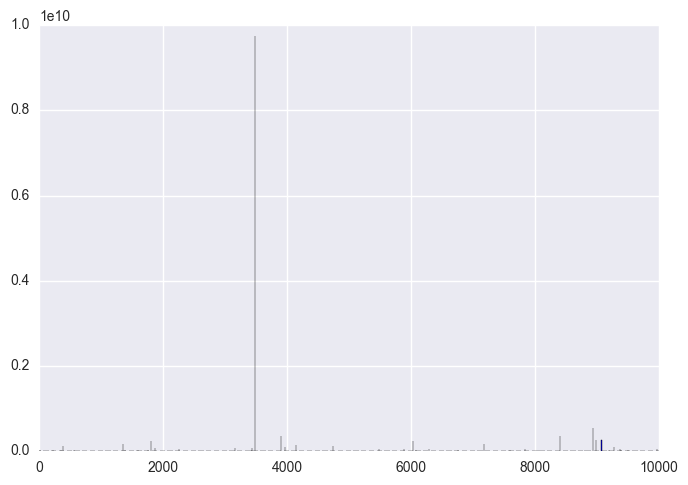

In [21]:
# plot simulation results
y = runs
N = len(y)
x = range(N)
width = 1/1.5
plt.bar(x, y, width, color="blue")


/home/atti/anaconda3/envs/py3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


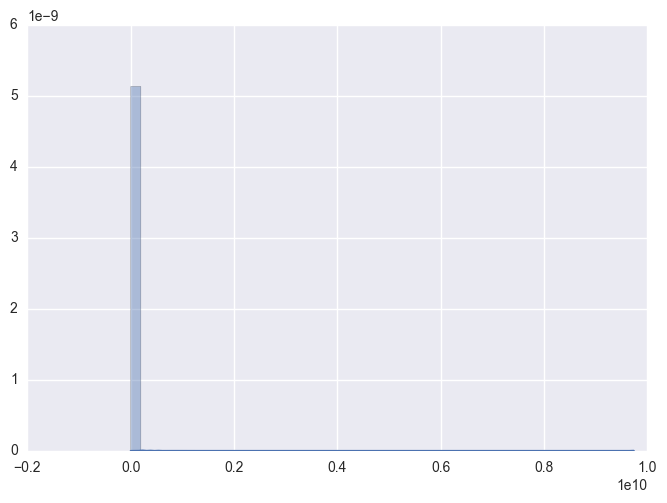

In [22]:
# distribution
sns.distplot(runs);